# code

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from scipy.stats import kruskal
import itertools

In [3]:
yf.Ticker('AAPL') # symbol for the company

yfinance.Ticker object <AAPL>

In [4]:
apple = yf.Ticker('AAPL')
apple = apple.history(period='6mo')
apple

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-07-25 00:00:00-04:00,218.436559,220.352245,214.136275,216.999817,51391200,0.0,0.0
2024-07-26 00:00:00-04:00,218.207072,218.995300,215.523133,217.468750,41601300,0.0,0.0
2024-07-29 00:00:00-04:00,216.471009,218.805732,215.263730,217.748123,36311800,0.0,0.0
2024-07-30 00:00:00-04:00,218.695975,219.833405,215.632887,218.306854,41643800,0.0,0.0
2024-07-31 00:00:00-04:00,220.940911,223.315552,220.132739,221.579468,50036300,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-17 00:00:00-05:00,232.119995,232.289993,228.479996,229.979996,68488300,0.0,0.0
2025-01-21 00:00:00-05:00,224.000000,224.419998,219.380005,222.639999,98070400,0.0,0.0
2025-01-22 00:00:00-05:00,219.789993,224.119995,219.789993,223.830002,64126500,0.0,0.0


In [5]:
apple.to_csv('APPL_data.csv')

In [6]:
apple.shape

(126, 7)

In [7]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126 entries, 2024-07-25 00:00:00-04:00 to 2025-01-24 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          126 non-null    float64
 1   High          126 non-null    float64
 2   Low           126 non-null    float64
 3   Close         126 non-null    float64
 4   Volume        126 non-null    int64  
 5   Dividends     126 non-null    float64
 6   Stock Splits  126 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 7.9 KB


In [8]:
apple.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,126.000000,126.000000,126.000000,126.000000,1.260000e+02,126.000000,126.0
mean,229.961657,232.092051,227.964570,230.303224,4.923418e+07,0.003968,0.0
std,11.134470,10.837329,11.261489,10.947082,2.975111e+07,0.031371,0.0
min,198.641276,209.516713,195.558244,206.762924,2.323470e+07,0.000000,0.0
25%,223.898219,225.284634,221.134208,222.693768,3.688165e+07,0.000000,0.0
50%,227.659521,229.332692,225.456943,227.659523,4.233200e+07,0.000000,0.0
75%,234.597500,236.472283,233.247501,235.027496,5.185342e+07,0.000000,0.0
max,258.190002,260.100006,257.630005,259.019989,3.186799e+08,0.250000,0.0


In [9]:
df = apple.drop(['High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], axis=1)
# Ensure the index is datetime and set frequency (daily or business days)
df.index = pd.to_datetime(df.index)
df = df.asfreq('B')  # 'B' for business days, or 'D' for daily frequency


In [10]:
print(df.isnull().sum())  # Ensure no NaNs

Open    6
dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2024-07-25 00:00:00-04:00 to 2025-01-24 00:00:00-05:00
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    126 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [12]:
df.describe()

,Open
count,126.000000
mean,229.961657
std,11.134470
min,198.641276
25%,223.898219
50%,227.659521
75%,234.597500
max,258.190002


<AxesSubplot: ylabel='Frequency'>

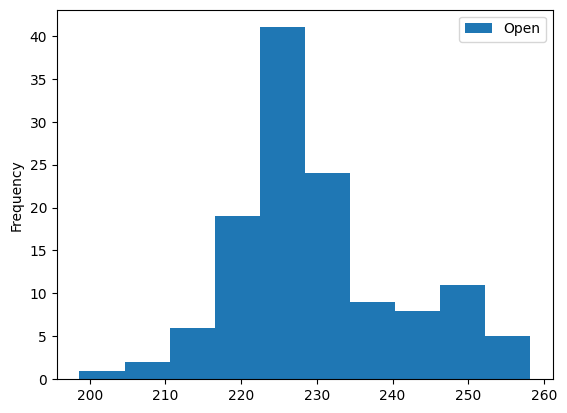

In [13]:
df.plot(kind='hist')

In [14]:
df.skew()

Open    0.465944
dtype: float64

<AxesSubplot: xlabel='Date'>

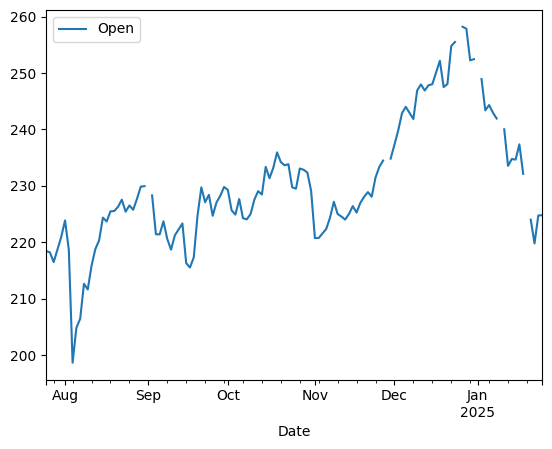

In [15]:
df.plot()

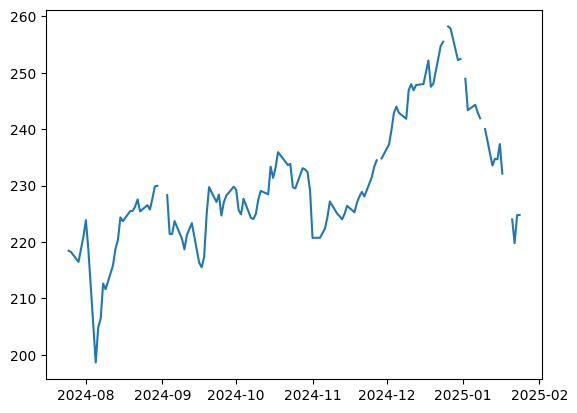

In [16]:
plt.plot(df)

In [17]:
df

,Open
Date,
2024-07-25 00:00:00-04:00,218.436559
2024-07-26 00:00:00-04:00,218.207072
2024-07-29 00:00:00-04:00,216.471009
2024-07-30 00:00:00-04:00,218.695975
2024-07-31 00:00:00-04:00,220.940911
...,...
2025-01-20 00:00:00-05:00,NaN
2025-01-21 00:00:00-05:00,224.000000
2025-01-22 00:00:00-05:00,219.789993


In [18]:
rollingmean = df.rolling(window=10).mean()
rollingmeanstd = df.rolling(window=10).std()

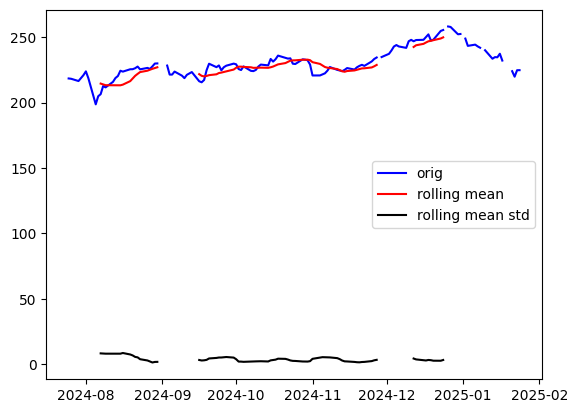

In [19]:
plt.plot(df, color='blue', label='orig')
plt.plot(rollingmean, color='red', label='rolling mean')
plt.plot(rollingmeanstd, color='black', label='rolling mean std')
plt.legend()

# adfuller 

In [20]:
# Check for missing or infinite values in the 'Open' column
print(df['Open'].isna().sum())  # Number of missing values
print(np.isinf(df['Open']).sum())  # Number of infinite values

# If there are missing or infinite values, drop them
df = df.dropna(subset=['Open'])  # Drop rows with missing 'Open' values
df = df[np.isfinite(df['Open'])]  # Drop rows with infinite 'Open' values


6
0


In [21]:
print(df['Open'].isna().sum())  # Number of missing values
print(np.isinf(df['Open']).sum())  # Number of infinite values

0
0


In [22]:
# Check if data is stationary (ADF test)
result = adfuller(df['Open'])
print(f'ADF Statistic: {result[0]}, p-value: {result[1]}')

ADF Statistic: -1.7389149548792184, p-value: 0.4111820072547554


# checking for seasonality

In [23]:
df

,Open
Date,
2024-07-25 00:00:00-04:00,218.436559
2024-07-26 00:00:00-04:00,218.207072
2024-07-29 00:00:00-04:00,216.471009
2024-07-30 00:00:00-04:00,218.695975
2024-07-31 00:00:00-04:00,220.940911
...,...
2025-01-17 00:00:00-05:00,232.119995
2025-01-21 00:00:00-05:00,224.000000
2025-01-22 00:00:00-05:00,219.789993


<AxesSubplot: xlabel='Date'>

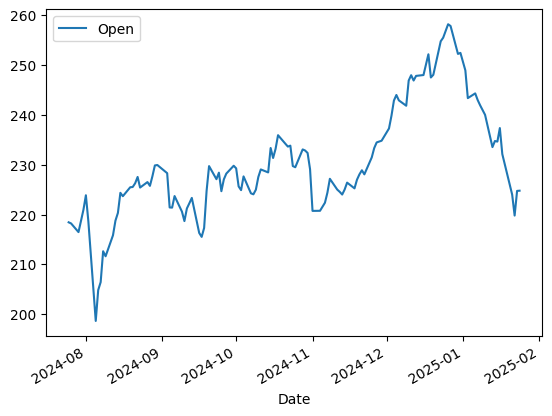

In [24]:
df.plot()

In [25]:
df['Month'] = df.index.month
df

,Open,Month
Date,,
2024-07-25 00:00:00-04:00,218.436559,7
2024-07-26 00:00:00-04:00,218.207072,7
2024-07-29 00:00:00-04:00,216.471009,7
2024-07-30 00:00:00-04:00,218.695975,7
2024-07-31 00:00:00-04:00,220.940911,7
...,...,...
2025-01-17 00:00:00-05:00,232.119995,1
2025-01-21 00:00:00-05:00,224.000000,1
2025-01-22 00:00:00-05:00,219.789993,1


In [26]:
monthly_groups = [group['Open'].values for name, group in df.groupby('Month')]

In [27]:
monthly_groups

[array([248.92999268, 243.36000061, 244.30999756, 242.97999573,
        241.91999817, 240.00999451, 233.52999878, 234.75      ,
        234.63999939, 237.3500061 , 232.11999512, 224.        ,
        219.78999329, 224.74000549, 224.77999878]),
 array([218.43655857, 218.20707238, 216.47100933, 218.69597463,
        220.94091084]),
 array([223.86429234, 218.65604975, 198.64127618, 204.83728149,
        206.43367474, 212.62967745, 211.62197119, 215.83255237,
        218.76929897, 220.32760355, 224.35317448, 223.67391069,
        225.4719428 , 225.52188563, 226.27106257, 227.5396608 ,
        225.41200238, 226.51079177, 225.75162067, 227.66950996,
        229.84713245, 229.93703146]),
 array([228.29882348, 221.4164072 , 221.38642912, 223.70388139,
        220.57732364, 218.67940838, 221.21662032, 222.25546947,
        223.33429284, 216.30201959, 215.51289221, 217.31091546,
        224.74274368, 229.71726252, 227.09015412, 228.39870926,
        224.68279593, 227.05019906, 228.20893469, 229.

In [28]:
# Using monthly data
stat, p_value = kruskal(*monthly_groups)


print(f"Kruskal-Wallis H statistic: {stat}")
print(f"P-value: {p_value}")

# Check if the p-value is below a significance level (e.g., 0.05)
if p_value < 0.05:
    print("There is a significant difference between the groups (seasonality detected).")
else:
    print("There is no significant difference between the groups (no seasonality detected).")


Kruskal-Wallis H statistic: 79.78736108466342
P-value: 3.953090020984882e-15
There is a significant difference between the groups (seasonality detected).


# Train the time series

In [29]:
df

,Open,Month
Date,,
2024-07-25 00:00:00-04:00,218.436559,7
2024-07-26 00:00:00-04:00,218.207072,7
2024-07-29 00:00:00-04:00,216.471009,7
2024-07-30 00:00:00-04:00,218.695975,7
2024-07-31 00:00:00-04:00,220.940911,7
...,...,...
2025-01-17 00:00:00-05:00,232.119995,1
2025-01-21 00:00:00-05:00,224.000000,1
2025-01-22 00:00:00-05:00,219.789993,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126 entries, 2024-07-25 00:00:00-04:00 to 2025-01-24 00:00:00-05:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    126 non-null    float64
 1   Month   126 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.0 KB


In [31]:
# Split data into training and testing sets
ts = df[['Open']].loc[:'2024-08-08 00:00:00-04:00']  # Adjust date as needed
test = df[['Open']].loc['2024-08-09 00:00:00-04:00':]

In [32]:
# Define SARIMAX model with orders (you can modify them based on model selection)
seasonal_model = SARIMAX(ts['Open'], order=(2,1,2), seasonal_order=(2,1,2,12))  # Adjust order based on the seasonality test
seasonal_model_final = seasonal_model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/yanellyhernandez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/yanellyhernandez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/yanellyhernandez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/yanellyhernandez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be 

I choose to use SARIMAX to fit the model since there is seasonality in the data based on the Kruskal-Wallis algorithum stating that the pval has to be less than 0.05.

In [33]:
# seasonal_model = SARIMAX(ts['Open'], order=(2,1,2), seasonal_order=(2,1,2,12)) # seasonal oreder: 4- p,d,q,seasonality
# seasonal_model_final = seasonal_model.fit()

"""used this for more data, but in this case I am using 6 months of data"""

'used this for more data, but in this case I am using 6 months of data'

https://numpy.org/doc/stable/reference/generated/numpy.nanargmin.html 

Since I am trying to get the best error (i.e low index), I am using np.nanargmin to find the best combination for both order and seasonal order


# predict price for next period

In [34]:
# Forecast the next 7 days
forecast_steps = 7
forecast = seasonal_model_final.forecast(steps=forecast_steps)

# Generate date range for forecasted values
forecast_dates = pd.date_range(ts.index[-1], periods=forecast_steps+1, freq='B')[1:]  # Generate next 7 business days

# Convert forecast to pandas Series for easier visualization
forecast = pd.Series(forecast, index=forecast_dates)

# Print forecasted prices for the next 7 days
print(f"Forecasted prices for the next 7 days:\n{forecast}")

Forecasted prices for the next 7 days:
2024-08-09 00:00:00-04:00    212.629677
2024-08-12 00:00:00-04:00    321.848011
2024-08-13 00:00:00-04:00    321.618525
2024-08-14 00:00:00-04:00    319.882462
2024-08-15 00:00:00-04:00    322.107427
2024-08-16 00:00:00-04:00    324.352364
2024-08-19 00:00:00-04:00    327.275745
Freq: B, Name: predicted_mean, dtype: float64


In [35]:
# Calculate Mean Squared Error between forecast and actual test set values
min_length = min(len(test), len(forecast))
test_aligned = test[:min_length]
forecast_aligned = forecast[:min_length]

# Calculate RMSE
mse = mean_squared_error(test_aligned, forecast_aligned, squared=False)
print(f"RMSE: {mse}")

RMSE: 93.94944325588457


/Users/yanellyhernandez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
